# DataCamp - Supervised Learning with scikit-learn NEW

In [1]:
# load data folder
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros_2/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

# 0) Load files

In [4]:
# load course files
music_clean = pd.read_csv(data_folder + "music_clean.csv", index_col=0)
telecom_churn_clean = pd.read_csv(data_folder + "telecom_churn_clean.csv", index_col=0)
diabetes_clean = pd.read_csv(data_folder + "diabetes_clean.csv", index_col=0)
advertising_and_sales_clean = pd.read_csv(data_folder + "advertising_and_sales_clean.csv", index_col=0)

# 1) Machine Learning with scikit-learn

In [5]:
# vídeo

# supervised learning
#  classification vs Regression (continuous)
#  Requirements:
#   - No missing values
#   - Data in numeric format
#   - Data stored in pandas DataFrame or numpy array
# which requires EDA first
# scikit-learn (makes it easy) sintax:
# 1) import model
# 2) create a variable (model) ans instantiate the model
# 3) fit to the data (X, Y)
# 4) predictions


# unsupervised learning


Binary classification

There are two types of supervised learning—classification and regression. Binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

In [6]:
telecom_churn_clean.head(3)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [7]:
# Looking at this data, which column could be the target variable for binary classification?
# "churn"

## The classification challenge

In [8]:
# vídeo

from sklearn.neighbors import KNeighborsClassifier

churn_df = telecom_churn_clean.copy()

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

print(X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# new observations
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])
print(X_new.shape)

predictions = knn.predict(X_new)
print("Predictions: ", predictions)


(3333, 2) (3333,)
(3, 2)
Predictions:  [1 0 0]


In [9]:
#########

In [10]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [11]:
# new observations
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 


Predictions: [0 1 0]


## Measuring model performance

(2333, 2) (2333,) (1000, 2) (1000,)
accuracy:  0.852


100%|███████████████████████████████████████████| 25/25 [00:01<00:00, 24.93it/s]


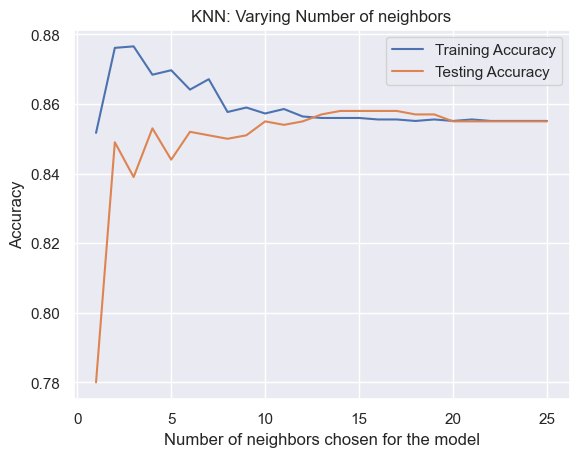

In [12]:
# vídeo

# Evaluation
# accuracy

# it is common to split the data in order to have a "training set" and a "test set" 
# -> then fit/train on "training" set --> then calculate accuracy using test set

from sklearn.model_selection import train_test_split

# parameters
# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21, stratify=y)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print("accuracy: ", knn.score(X_test, y_test))

####

# > k => less complex model => potential underfitting
# < k => more complex model => potential overfitting

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for i in tqdm(neighbors):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracies[i] = knn.score(X_train, y_train)
    test_accuracies[i] = knn.score(X_test, y_test)

# plot
plt.title("KNN: Varying Number of neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors chosen for the model")
plt.ylabel("Accuracy")
plt.show()

In [13]:
##########

In [14]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


In [15]:
# Overfitting and underfitting

# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)

# print
print(neighbors, '\n\nTrain accuracies:\n', train_accuracies, '\n\nTest accuracies:\n', test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12] 

Train accuracies:
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 

Test accuracies:
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


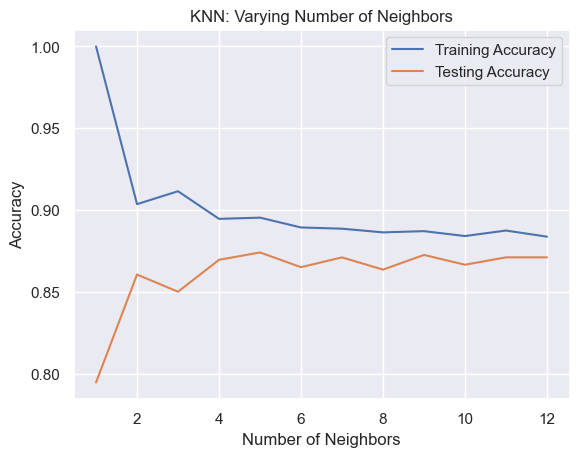

In [16]:
# Plot the results

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. 

For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. 

Now let's explore regression models!

# 2) Regression

## Introduction to Regression

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


[[ 6.    72.    35.    ...  0.627 50.     1.   ]
 [ 1.    66.    29.    ...  0.351 31.     0.   ]
 [ 8.    64.     0.    ...  0.672 32.     1.   ]
 ...
 [ 5.    72.    23.    ...  0.245 30.     0.   ]
 [ 1.    60.     0.    ...  0.349 47.     1.   ]
 [ 1.    70.    31.    ...  0.315 23.     0.   ]] <class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[33.6 26.6 23.3 28.1 43.1]
(768,) (768,)
[[33.6]
 [26.6]
 [23.3]
 [28.1]
 [43.1]]
(768,) (768, 1)


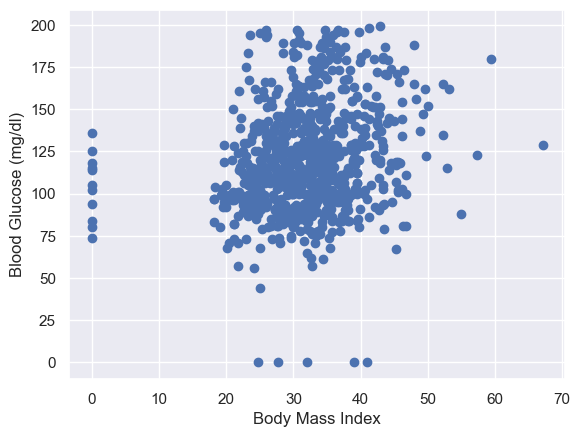

In [17]:
# vídeo

# load data with continuous variables
diabetes_df = diabetes_clean.copy().reset_index()
display(diabetes_df.head())

# drop the target
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

print(X, type(X))
print(type(y))

########

# Making predictions from a single feature
X_bmi = X[:, 4]
print(X_bmi[:5])
print(y.shape, X_bmi.shape) # 1-dimensional array: ok for y, but it has though to be a 2-dimensional array for X, so...

# it's just that it needs this format to be accepted in scikit-learn
X_bmi = X_bmi.reshape(-1, 1)   # another way would be [[i] for i in X[:, 4]]
print(X_bmi[:5])
print(y.shape, X_bmi.shape)

#########

# Plotting glucose bs bmi
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

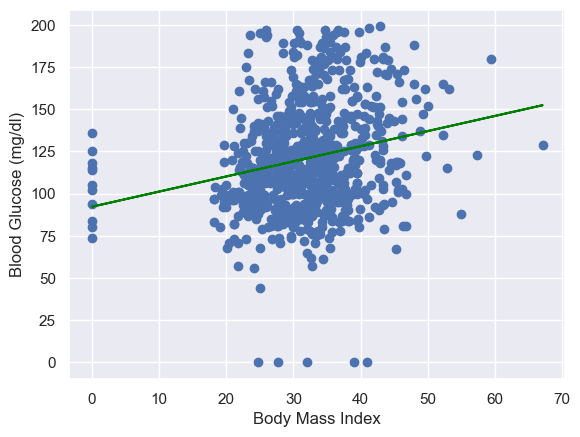

In [18]:
# Fitting a regression model
from sklearn.linear_model import LinearRegression

# instantiate
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='green')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [19]:
###########

In [20]:
# data
sales_df = advertising_and_sales_clean.copy().reset_index()
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [21]:
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X (since it's only 1 variable)
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


In [22]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)
print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


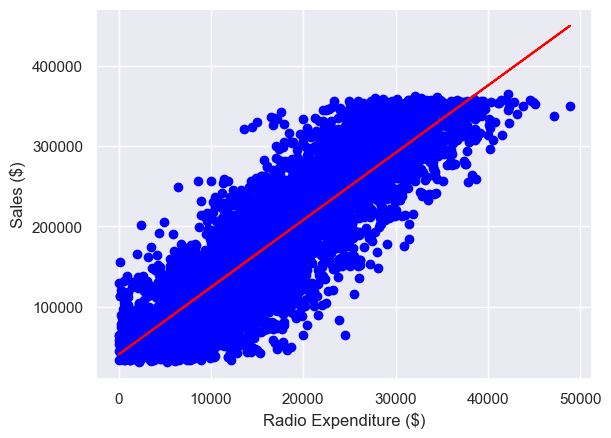

In [23]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## The basics of linear regression

In [24]:
# vídeo

# Ordinary Least Squares (OLS)

# Linear regression in higher dimensions (more than 1 variable)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create X and y
# X = sales_df[["tv", "radio", "social_media"]].values
X = sales_df["tv"].values.reshape(-1, 1)
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

reg_all = LinearRegression() # OLS under the hood
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)


# Evaluate the performance

# 1) The default metric for linear regression is R squared, which quantifies the 
# variance in target values explained by the features 
# - values range from 0 to 1

print("R squared: ", reg_all.score(X_test, y_test)) # R squared


# 2) Another way is the Mean squared error (MSE) and root mean squared error (RMSE)
# MSE is measured in target units, squared
# To convert back into the unis of the target variable, use RMSE -> square the MSE

from sklearn.metrics import mean_squared_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", rmse)


R squared:  0.9990171438538941
MSE:  8652666.19286932
RMSE:  2941.5414654342917


In [25]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [26]:
############

In [27]:
# Create X and y arrays
X = sales_df[["tv", "radio", "social_media"]].values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)


# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, \nActual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], 
Actual Values: [55261.28 67574.9 ]


In [28]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
# rmse = mean_squared_error(y_test, y_pred, squared=False)  # old way
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))


R^2: 0.9990152104759368
RMSE: 2944.4331996001238


The features explain 99.9% of the variance in sales values - Looks like this company's advertising strategy is working well

## Cross-validation

In [29]:
# vídeo

# cross-validation -> it's essentially a random split

# Split -> Fold 1; Fold 2; Fold 3; Fold 4; Fold 5
# the test set varies in each iteration (1st it's Fold 1, then Fold 2, etc). We get 5 metrics

# 5 folds = 5-fold CV
# 10 folds = 10-fold CV
# k folds = k-folds CV
# More folds => more computationally expensive

from sklearn.model_selection import cross_val_score, KFold

# we've could have just defined cv=6 in cross_val_score but this way we guarantee repeatability
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Create X and y arrays
X = sales_df[["radio", "social_media"]].values
y = sales_df["sales"].values

# our model
reg = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=kf) # the default results are R^2, the default for linear regression
print("cv_results: ", cv_results)

print("\nmean: ", np.mean(cv_results))
print("std: ", np.std(cv_results))

print("95% confidence interval: ", np.quantile(cv_results, [0.025, 0.975]))

cv_results:  [0.75187559 0.76589813 0.75262628 0.76412429 0.72538175 0.76308008]

mean:  0.7538310201432022
std:  0.013854887619993669
95% confidence interval:  [0.72869348 0.7656764 ]


In [30]:
#######

In [31]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

X = sales_df[["radio", "social_media"]].values
y = sales_df["sales"].values
reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


In [32]:
# Print the mean
print("Mean: ", np.mean(cv_scores))

# Print the standard deviation
print("Std: ", np.std(cv_scores))

# Print the 95% confidence interval
print("95% confidence interval: ", np.quantile(cv_scores, [0.025, 0.975]))

Mean:  0.7536937414361207
Std:  0.012305389070474732
95% confidence interval:  [0.74141863 0.77191916]


## Regularized regresssion

In [33]:
#vídeo

# Why regularize?
#  Recall: Linear regressions minimizes a loss function
#  It chooses a coefficient, a, for each feature variable, plus b
#  Large coefficients can lead to overfitting
# Penalizing large coefficients --> Regularization


In [34]:
# 1) Ridge regression
#   Loss function = OLS loss function + 'alpha'*np.sum(ai^2)
#    models are penalized for coefficients with a large magnitude (large positive and large negative)
#       'alpha' == a parameter we need to choose
#       picking 'alpha' is similar to picking k in k-NN --> (Hyperparameter tuning - chapter 3)
#       'alpha' controls model complexity
#            'alpha' = 0 ---> OLS, can be overfitting
#            'alpha' very high ---> underfitting

# o 'alpha' é o q costuma aparecer como 'lambda' na literatura
# ridge regression will include all p predictors in the final model.

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = sales_df[["radio", "social_media"]].values
y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scores = []

for alpha in [0.1, 1, 10, 1000, 1000000000000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

print(scores)


[0.760881722233227, 0.7608817222331742, 0.7608817222326456, 0.7608817221745073, 0.3089916592904156]


In [35]:
# 2) LASSO regression
#   Loss function = OLS loss function + 'alpha'*np.sum(|ai|)

# Can be used to select important features of a dataset (shrinks the coefficients to 0, while Ridge maintains all)

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = sales_df[["radio", "social_media"]].values
y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scores = []

for alpha in [0.1, 1, 10, 1000, 1000000000000]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

print(scores)


[0.7608817222418861, 0.760881722306458, 0.7608817228721916, 0.7608817926088887, -2.6116066893511203e-05]


Column names / variables:  Index(['pregnancies', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age',
       'diabetes'],
      dtype='object') 

lasso_coef:  [-0.44744635  0.11662917 -0.28627271  0.0906138   0.31619679  0.81490392
  0.48641529 24.60117613] 

[('pregnancies', -0.4474463526404875), ('diastolic', 0.11662917460723508), ('triceps', -0.2862727116126401), ('insulin', 0.09061379504012126), ('bmi', 0.31619679146677976), ('dpf', 0.8149039238733479), ('age', 0.486415292182234), ('diabetes', 24.6011761260093)]


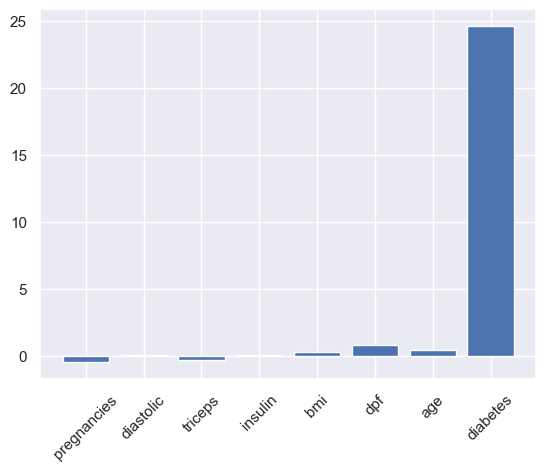

In [36]:
from sklearn.linear_model import Lasso

# Can be used to select important features of a dataset (shrinks the coefficients to 0, while Ridge maintains all)

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
print("Column names / variables: ", names, "\n")

# instantiate the model Lasso
lasso = Lasso(alpha=0.1)

# Lasso coefficient
lasso_coef = lasso.fit(X, y).coef_
print("lasso_coef: ", lasso_coef, "\n")

# each coefficient is
print(list(zip(names, lasso_coef)))

# plot
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()


In [37]:
########

In [38]:
# Import Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = sales_df[["tv", "radio", "social_media"]].values
y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]


[ 3.56256962 -0.00397035  0.00496385]


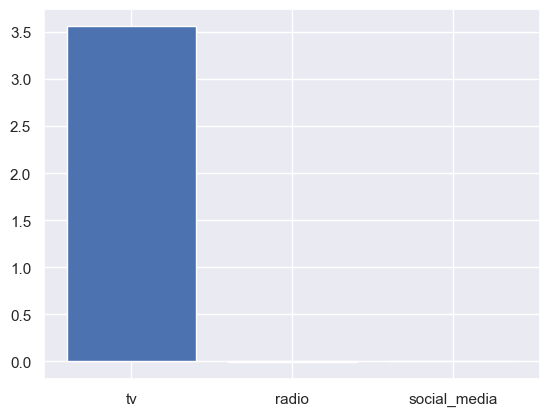

In [39]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

sales_columns = sales_df[["tv", "radio", "social_media"]].columns

plt.bar(sales_columns, lasso_coef)
plt.show()

# 3) Fine-Tuning your Model

## How good is your model?

In [40]:
#vídeo

# Classification metrics

#  Measuring model performance with accuracy:
#     Fraction of correctly classified samples
#     Not always a useful metric! (class imbalances)

# --> Class imbalance (common situation). Example (emails):
#         Consider a spam classification - 99% e-mails are real, 1% is spam
#         could build a model that predicts that ALL emails are real:
#           - it would be correct 99% of the time !
#           - but it would be a horrible classifier of spam: it would never predict spam


# Diagnosing classification predictions

# Confusion matrix: Actual  vs Predicted  (true/false positive, true/false negative)
#     usually we're interessed in the positive class (we are trying to predict spam, so it's positive)
#           True positive (correct)
#           False positive (incorrect) - we predicted spam but it was real email

# Accuracy: 
#     (tp + tn) / (tp+tn + fp+fn)

# Precision: 
#     tp / (tp+fp)

# Recall, sensitivity or true positive rate (TPR):
#     tp / (tp+fn)

# F1 score (the harmonic mean of precision and recall):
#     2 *  (precision*recall) / (precison + recall)

# High precision: not many real emails predicted as spam
# High recall: predicted most spam emails correctly

# The support gives the number of samples of the true response that lie in that class

# Confusion matrix in scikit-learn


from sklearn.metrics import classification_report, confusion_matrix

# example
knn = KNeighborsClassifier(n_neighbors=8)

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred)) 

print(classification_report(y_test, y_pred))

# support represents the number of instances that for class within the true labels


[[1123   15]
 [ 149   47]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1138
           1       0.76      0.24      0.36       196

    accuracy                           0.88      1334
   macro avg       0.82      0.61      0.65      1334
weighted avg       0.86      0.88      0.85      1334



In [41]:
####################

**Deciding on a primary metric**

Select the problem where ***precision*** is best suited as the primary metric.

- A model predicting if a customer is a high-value lead for a sales team with limited capacity.


In [42]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# exercise assumptions / data
X = diabetes_df[["bmi", "age"]].values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117  34]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.64      0.65      0.64       231



## Logistic regression and the ROC curve

Probability that the first observation has churned: 0.1882602003811278 

ROC curve API given number of arrays: 3


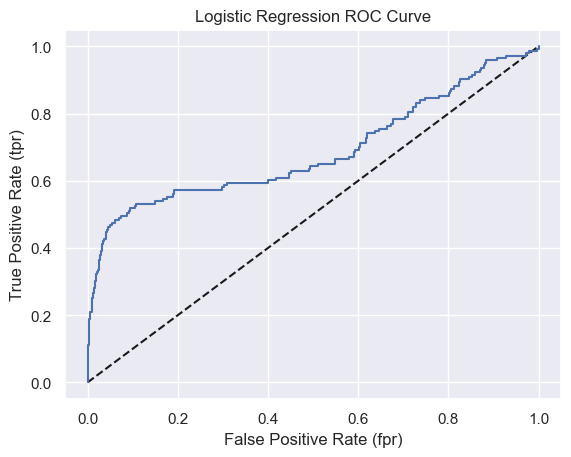

ROC auc score:  0.6870364174914934


In [45]:
#vídeo

# Logistic regression for binary classification

# Logistic regression outputs probabilities
#  If the probability 'p' is greater than 0.5, the data is labeled '1'
#  If the probability 'p' is less than 0.5, the data is labeled '0'
# it produces a linear decision boundary


# 1) Logistic regression in scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

####################################################################################################

# 2) Predicting probabilities

y_pred_prob = logreg.predict_proba(X_test)[:, 1] #probability of the predicted labels being 1
print("Probability that the first observation has churned:", y_pred_prob[0], "\n") 

# Probability thresholds

# By default, the logistic regression threshold = 0.5
# this is not specific to logistic regression (k-NN also have thresholds)
# What happens if we vary this threshold?
# in particular, what happens to the true positive and false positive rates?

# The ROC curve ---> Receiver Operating Characteristics curve
# threshold = 0 ==> true positive rate == false positive rate == 1
# threshold = 1 ==> true positive rate == false positive rate == 0
#       It tells how much the model is capable of distinguishing between classes.

# Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve 

roc = roc_curve(y_test, y_pred_prob)
print("ROC curve API given number of arrays:", len(roc))
fpr, tpr, thresholds = roc

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LogisticRegression')
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.title("Logistic Regression ROC Curve")
plt.show()

######

# Larger area under the ROC curve = better model

from sklearn.metrics import roc_auc_score

print("ROC auc score: ", roc_auc_score(y_test, y_pred_prob))


In [46]:
logreg.predict_proba(X_test)

array([[0.8117398 , 0.1882602 ],
       [0.92532353, 0.07467647],
       [0.98042725, 0.01957275],
       ...,
       [0.9417008 , 0.0582992 ],
       [0.84293751, 0.15706249],
       [0.91873664, 0.08126336]])

In [47]:
%%time

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

display(diabetes_df.head(2))
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
print("First 10 probabilities predicted:")
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


First 10 probabilities predicted:
[0.26655163 0.19015617 0.12360057 0.14564553 0.50456804 0.45330293
 0.01327985 0.59610424 0.56325765 0.79990887]
CPU times: user 35.6 ms, sys: 2.95 ms, total: 38.6 ms
Wall time: 12.5 ms


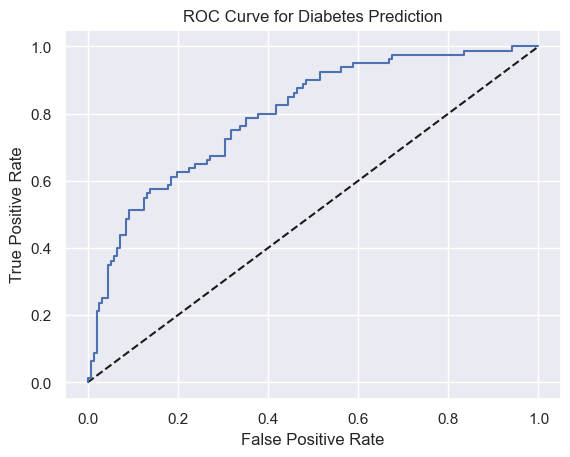

In [48]:
# Import roc_curve
from sklearn.metrics import roc_curve 

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show() 
# The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

In [49]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate roc_auc_score
print("ROC auc score for logistic regression: ", roc_auc_score(y_test, y_pred_probs))
print("\n")

#########

# Compare with a KNN model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
print("KNN model:")
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

ROC auc score for logistic regression:  0.796523178807947


KNN model:
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



 logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

## Hyperparameter tuning

In [50]:
#vídeo

# Linear regression: Choosing parameters
# Ridge/Lasso regression: Choosing 'alpha'
# k-Nearest Neighbors: Choosing 'n_neighbors'
# Parameters like 'alpha' and 'k': Hyperparameters
# that is, Hyperparameters cannot be learned by fitting the model

# Choosing the correct Hyperparameter is key

# traditional method (hyperparameter tuning): 
#   - try different hyperparameter values
#   - fit them all separately
#   - see how well each performs
#   - choose the best

# ---->> It's essential to use cross-validation, train-test split alone would risk overfitting the hyperparameters to 
#        the test set.
# a seguir vamos ver que: 
#   even after tuning the hyperparameter using cross-validation, we'll want to already split off a test set in order to 
#   report how well our model can be expected to perform on a data set that has never seen before

# Grid search cross-validation
from sklearn.model_selection import GridSearchCV

# keys are the hyperparameter names [n_neighbors (k-NN), alpha(Ridge/Lasso)]
param_grid = {"n_neighbors": [11, 8, 5, 2], 
              "metric": ['euclidian', 'manhattan', 'cosine']}  # for KNN model
# (see the documentation on each model for the name of parameters)

# knn = KNeighborsClassifier()
# knn_cv = GridSearchCV(knn, param_grid, cv=5)

# X = churn_df[["total_day_charge", "total_eve_charge"]].values
# y = churn_df["churn"].values

# knn_cv.fit(X, y)  # this fit performs the actual Gridsearch in place    

# # best parameters
# print(knn_cv.best_params_)

# # best score
# print(knn_cv.best_score_)

#################################################################################

# Grid search cross-validation
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge

# using sales dataset
X = sales_df[["radio", "social_media"]].values
y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha": np.linspace(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)

ridge_cv.fit(X_train, y_train) # this fit provides the actual cross-validated grid search

print("Best parameters: ", ridge_cv.best_params_)
print("Best score: ", ridge_cv.best_score_)

#################################################################################

# vamos ver tb 'RandomizedSearchCV' - it's similar but jumps around the grid

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.linspace(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}

ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)#n_iter is nr of hyperp tested. 5-fold+n_iter=2 => 10 fits

ridge_cv.fit(X_train, y_train) # this fit provides the actual cross-validated grid search

print("\nBest parameters: ", ridge_cv.best_params_)
print("Best score: ", ridge_cv.best_score_)

#################################################################################

# Evaluating on the test set

test_score = ridge_cv.score(X_test, y_test)
print(test_score)

Best parameters:  {'alpha': 0.2223, 'solver': 'sag'}
Best score:  0.7504589664461182

Best parameters:  {'solver': 'lsqr', 'alpha': 0.7778}
Best score:  0.7504583109956791
0.7608817222331866


In [51]:
####

In [52]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso()
kf = KFold(n_splits=8, shuffle=True, random_state=42)

##

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.30096121029837625


Unfortunately, the best model only has an R-squared score of 0.30, highlighting that using the optimal hyperparameters does not guarantee a high performing model

As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

logreg = LogisticRegression(max_iter=1000)

X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [54]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.8571571428571428, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.7428571428571429}
Tuned Logistic Regression Best Accuracy Score: 0.636846659743856


/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

# 4) Preprocessing and Pipelines

## Preprocessing data

In [55]:
# vídeo (ver abaixo)

# Dealing with categorical features

# Scikit-learn will not accept categorical features by default
# --> need to encode categorical features numerically
# Convert to 'dummy variables':
#    0: observation was not that category
#    1: observation was that category
# attention with the duplication of variables/information- scikit-learn may not be able to deal with this (0, 0, 1)

# Dealing with categorical features in Python:
# ---> scikit-learn: OneHotEncoder()
# ---> pandas: get_dummies()

# Music dataset
# popularity: target variable
# genre: categorical feature 

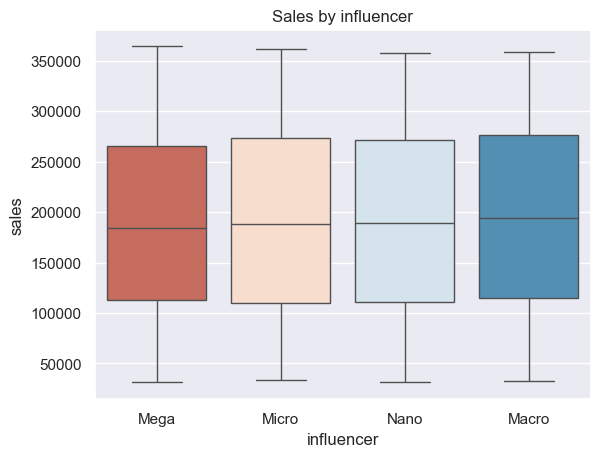

In [56]:
# EDA with categorical features
sns.boxplot(x='influencer', y='sales', data=sales_df, hue='influencer', palette="RdBu")
plt.title("Sales by influencer")
plt.show()

In [57]:
# Encoding dummy variables (with pandas)
display(sales_df.head(2))
sales_df["influencer"].value_counts()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90


influencer
Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: count, dtype: int64

In [58]:
# Encoding dummy variables (with pandas) -> get dummies
sales_dummies = pd.get_dummies(sales_df["influencer"], drop_first=True)
sales_dummies.head()

,Mega,Micro,Nano
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False


In [59]:
# join the dummies df created with original dataframe
sales_df_dummies = pd.concat([sales_df, sales_dummies], axis=1)
display(sales_df_dummies.head())

# remove the 'influencer' (categorical) column
sales_df_2 = sales_df_dummies.drop("influencer", axis=1)
display(sales_df_2.head())

,tv,radio,social_media,influencer,sales,Mega,Micro,Nano
0,16000.0,6566.23,2907.98,Mega,54732.76,True,False,False
1,13000.0,9237.76,2409.57,Mega,46677.90,True,False,False
2,41000.0,15886.45,2913.41,Mega,150177.83,True,False,False
3,83000.0,30020.03,6922.30,Mega,298246.34,True,False,False
4,15000.0,8437.41,1406.00,Micro,56594.18,False,True,False


,tv,radio,social_media,sales,Mega,Micro,Nano
0,16000.0,6566.23,2907.98,54732.76,True,False,False
1,13000.0,9237.76,2409.57,46677.90,True,False,False
2,41000.0,15886.45,2913.41,150177.83,True,False,False
3,83000.0,30020.03,6922.30,298246.34,True,False,False
4,15000.0,8437.41,1406.00,56594.18,False,True,False


In [60]:
# if the dataframe has only 1 categorical feature, then it's easier to just
sales_df_3 = pd.get_dummies(sales_df, drop_first=True)
display(sales_df_3.head())

,tv,radio,social_media,sales,influencer_Mega,influencer_Micro,influencer_Nano
0,16000.0,6566.23,2907.98,54732.76,True,False,False
1,13000.0,9237.76,2409.57,46677.90,True,False,False
2,41000.0,15886.45,2913.41,150177.83,True,False,False
3,83000.0,30020.03,6922.30,298246.34,True,False,False
4,15000.0,8437.41,1406.00,56594.18,False,True,False


In [61]:
# dataset used for 4) ----> already worked out
music_df = music_clean.copy()
print(music_df.shape)
music_df.head()

(1000, 12)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [62]:
#vídeo

# back to original example (already worked out...)

X = music_df.drop('popularity', axis=1).values
y = music_df['popularity'].values

# Linear regression with dummy variables
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)
print("R^2: {} , with Linear regression".format(linreg.score(X_test, y_test)))


# cross val score --> we choose scoring="negative MSE" because cross_val_score assumes higher values are better!
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))

linreg_cv = cross_val_score(linreg, X_test, y_test, cv=kf, scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))

R^2: 0.30311131622972154 , with Linear regression
[10.33283663 10.92843432  9.44214931  9.38877822  9.78719123]
[10.76159204 11.75878791 13.02534343 12.36703406 12.82103692]


In [63]:
#################################

In [64]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

music_dummies.head(2)

Shape of music_dummies: (1000, 12)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.89600,0.726,214547.0,0.177,0.000002,0.116,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.00384,0.635,190448.0,0.908,0.083400,0.239,-4.795,0.0563,110.012,0.637,1


In [65]:
# Create X and y
X = music_dummies.drop("popularity", axis=1)
y = music_dummies["popularity"]

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 10.334930115405797
Standard Deviation of the target array: 14.021569099070188


An average RMSE of approximately 10 is lower than the standard deviation of the target variable (song popularity) 14, suggesting the model is reasonably accurate.

## Handling missing data

In [66]:
# vídeo

# check missing values
music_df.isna().sum().sort_values()

# How to deal with missing values?

# Option 1) Dropping missing data
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Option 2) Imputing values (use subject-matter expertise to replace missing data with educated guesses)
# It's common to use the mean, or median
# If it's a categorical feature, we typically use the most frequent value - the mode
# We must *split* our data first, to avoid data leakage (don't infect the test set - X_test, y_test)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X_cat = sales_df["influencer"].values.reshape(-1, 1)
X_num = sales_df.drop(["influencer", "sales"], axis=1).values
y = sales_df["sales"].values

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=12)

# for the categorical data
imp_cat = SimpleImputer(strategy="most_frequent") # by default, SimpleImputer expects np.nan to represent missing values
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# for the numeric data 
imp_num = SimpleImputer() # by default it fill values data with the --> "mean" (strategy)
X_train_num = imp_cat.fit_transform(X_train_num)
X_test_num = imp_cat.transform(X_test_num)

# join
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)


In practice, fit_transform() is often used when you're working with training data, as it both learns from and applies the transformation to that data. You would generally use fit() on training data, and transform() (without fitting) on test data to ensure the test set is transformed using the parameters derived from the training set.

In [67]:
# Imputers are known as transformers

# Imputing within a Pipeline

from sklearn.pipeline import Pipeline

# transformation made...
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

# back to original
music_df = pd.read_csv(data_folder + "music_clean.csv", index_col=0)

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

# Create the steps, instantiate the transformer and/or model
steps = [("imputation", SimpleImputer()), 
         ("logistic_regression", LogisticRegression(max_iter=10000))]

# pass the list
pipeline = Pipeline(steps)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the pipeline with the data (as in any other model, but in this case it deals with the missing data first)
pipeline.fit(X_train, y_train)

# compute accuracy
print("Accuracy: ", pipeline.score(X_test, y_test))

# Note: In a pipeline, each step but the last must be a transformer

Accuracy:  0.8133333333333334


Note: **In a pipeline, each step but the last must be a transformer**.

In [68]:
# # Print missing values for each column
# print(music_df.isna().sum().sort_values())

# # Print missing values for each column
# print(music_df.isna().sum().sort_values())

# # Remove values where less than 5% are missing
# music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# # Convert genre to a binary feature
# music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

# print(music_df.isna().sum().sort_values())
# print("Shape of the `music_df`: {}".format(music_df.shape))

In [69]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

In [70]:
# steps = [("imputer", imp_mean),
#         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[75 75]
 [74 76]]


## Centering and scaling

In [71]:
# vídeo

# Why scale our data?
print(music_df[["duration_ms", "loudness", "speechiness"]].describe())

# Many models use some form of distance to inform them
# Features on larger scales can unduly influence the model
# Example: k-NN uses distance explicitly when making predictions --> we then want the features to be on a similar scale
# ---> Normalizing (or scaling and centering)

# Ways to normalize the data

# 1) Standardization: subtract the mean and divide by variance (all features centered around 0 and have variance 1)
# 2) Subtract by the minimum and divide by the range (minimum 0 and maximum 1)
# 3) Normalize so that the data ranges from -1 to +1

# we're going to do 1) Standardization --> see sklearn docs for the other 2 methods

        duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.172204e+05    -8.253305     0.077879
std    1.175582e+05     5.158523     0.089451
min   -1.000000e+00   -38.718000     0.023400
25%    1.806562e+05    -9.775500     0.033100
50%    2.163000e+05    -6.855000     0.043600
75%    2.605025e+05    -4.977750     0.074950
max    1.617333e+06    -0.883000     0.710000


In [72]:
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

############################################################################################################

# Scaling in scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("mean and std of X:", np.mean(X), np.std(X))
print("mean and std of X_scaled:", round(np.mean(X_train_scaled)), np.std(X_train_scaled), "\n")


mean and std of X: 19762.413275219726 71791.8429618064
mean and std of X_scaled: 0 1.0000000000000002 



In [73]:
# Scaling in a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = knn_scaled.predict(X_test)

# score with the X_scaled
print("score with the X_scaled:", knn_scaled.score(X_test, y_test))

# score with the features unscaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print("score with the X unscaled:", knn_unscaled.score(X_test, y_test), "\n")


score with the X_scaled: 0.805
score with the X unscaled: 0.56 



In [74]:
# CV and scaling in a pipeline
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors': np.arange(1, 50)}    # 'knn' + '__' + 'hyperparameter'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print("best parameter: k = ", cv.best_params_)
print("score:", cv.score(X_test, y_test))
print("Classification report:\n", classification_report(y_test, y_pred))

best parameter: k =  {'knn__n_neighbors': 12}
score: 0.82
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79        97
           1       0.76      0.94      0.84       103

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.82       200
weighted avg       0.84      0.82      0.82       200



In [75]:
#############################

In [76]:
X = music_df.drop("loudness", axis=1).values
y = music_df["loudness"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#######################################

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

##

# Without scaling
steps = [("lasso", Lasso(alpha=0.5))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.7185052288252618
0.5031316281225607


The model may have only produced an R-squared of 0.71, but without scaling this exact model would have only produced a score of 0.50, which proves just how powerful scaling can be!

In [77]:
music_df.head(2)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.89600,0.726,214547.0,0.177,0.000002,0.116,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.00384,0.635,190448.0,0.908,0.083400,0.239,-4.795,0.0563,110.012,0.637,1


In [78]:
# load data
music_df = pd.read_csv(data_folder + "music_clean.csv", index_col=0)
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

###

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]

pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training data
cv.fit(X_train, y_train)
print("Best score: ", cv.best_score_)
print("Best parameters:", cv.best_params_)

Best score:  0.8625
Best parameters: {'logreg__C': 0.15873684210526315}


## Evaluating multiple models

In [79]:
# vídeo

# Which model to use in the first place?

# Different models for different problems - Some guiding principles:

# 1) Size of the dataset
#  - fewer features -> simpler model, faster training time
#  - some models (such as artificial neural networks) require large amounts of data to perform well

# 2) We may need interpretability in the model
#  - some models are easier to explain, which can be important for stakeholders
#  - for example, Linear regression has high interpretability, as we can understand the coefficients

# 3) Flexibility might be important to get the most accurate predictions
#  - generally more flexible models improve accuracy, by making fewer assumptions about the data
#  - for example, a KNN model is more flexible, doesn't assume any linear relationships

#####

# It's all in the metrics

# Regression models performance:
#  - RMSE
#  - R-squared

# Classification model performance
#  - Accuracy
#  - Confusion matrix
#  - Precision, Recall, F1-score
#  - ROC AUC (logreg)

# Therefore --> Train several models and evaluate performance out of the box

# Don't forget *scaling* / Standardization
# Many models are affected by it: KNN, Linear Regression (and Ridge, Lasso), LogReg, Artificial Neural Networks


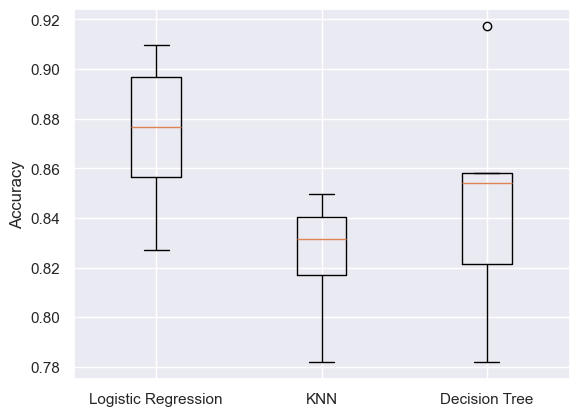

In [80]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

# load data
music_df = pd.read_csv(data_folder + "music_clean.csv", index_col=0)

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create a dictionary with the models and instantiate the models
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

results = []
# loop the models
for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, tick_labels=models.keys())
plt.ylabel("Accuracy")
plt.show()

In [81]:
# Test set performance

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))


Logistic Regression Test Set Accuracy: 0.805
KNN Test Set Accuracy: 0.785
Decision Tree Test Set Accuracy: 0.74


In [82]:
#########

In [83]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# load data
music_df = pd.read_csv(data_folder + "music_clean.csv", index_col=0)

X = music_df.drop("energy", axis=1).values
y = music_df["energy"].values

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


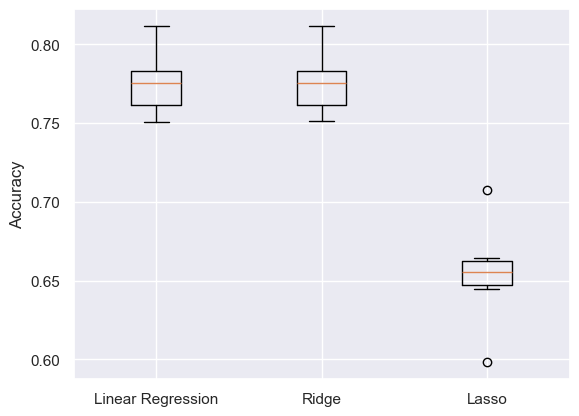

In [84]:
# Predict song's "energy"

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, tick_labels=models.keys())
plt.ylabel("Accuracy")
plt.show()

Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.

In [85]:
# In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select
# either of those models; however, you can check predictive performance on the test set to see if either one can 
# outperform the other.

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# You will use root mean squared error (RMSE) as the metric. 

# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

for name, model in models.items():
    
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = root_mean_squared_error(y_test, y_pred)
  print("{} Test Set RMSE: {}".format(name, test_rmse))


Linear Regression Test Set RMSE: 0.11140116509771887
Ridge Test Set RMSE: 0.11140405394479373
Lasso Test Set RMSE: 0.17329638628819174


The linear regression model just edges the best performance, although the difference is a RMSE of 0.00003 for popularity! 
Now let's look at classification model selection.

In [86]:
# Visualizing classification model performance

In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

# load data
music_df = pd.read_csv(data_folder + "music_clean.csv", index_col=0)

# change popularity column. Rule: above or below the median
pop_median = np.median(music_df["popularity"])
print("Median of popularity feature: ", pop_median)

music_df["popularity"] = music_df["popularity"].apply(lambda x: 1 if x >= pop_median else 0)

X = music_df.drop("popularity", axis=1).values
y = music_df["popularity"].values

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Median of popularity feature:  54.0


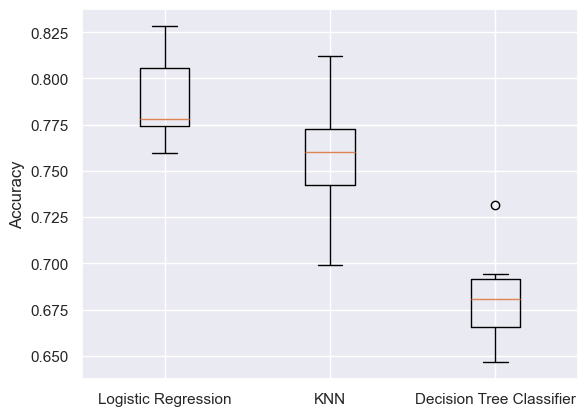

In [88]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)

plt.boxplot(results, tick_labels=models.keys())
plt.ylabel("Accuracy")
plt.show()

In [89]:
# Pipeline for predicting song popularity

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
          "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))


Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.73


you've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 73% accurate in predicting song genres!

In [90]:
# MEU --> but only imputed and scaled AFTER checking the boxplot... check with every model (different parameters)

from tqdm import tqdm 

models = {"logreg": LogisticRegression(), 
          "knn": KNeighborsClassifier(),
          "dtc": DecisionTreeClassifier()}


for name, model in tqdm(models.items()):

    # Create steps
    steps = [("imp_mean", SimpleImputer()), 
             ("scaler", StandardScaler()), 
             ("{}".format(name), model)]
    
    # Set up pipeline
    pipeline = Pipeline(steps)
    if name == "Logistic Regression":
        params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"], "logreg__C": np.linspace(0.001, 1.0, 20)}
        
    elif name == "knn":
        params = {'knn__n_neighbors': np.arange(1, 50)}

    elif name == "dtc":
        params = {'dtc__criterion': ['gini', 'entropy'], 'dtc__max_depth': [3, 5, 7, None], 
                  'dtc__min_samples_split': [2, 5, 10],
                  'dtc__min_samples_leaf': [1, 2, 4], 'dtc__max_features': [None, 'sqrt', 'log2']}

    # Create the GridSearchCV object
    tuning = GridSearchCV(pipeline, param_grid=params)
    tuning.fit(X_train, y_train)
    y_pred = tuning.predict(X_test)
    
    # Compute and print performance
    print("Tuned {} Parameters: {}, Accuracy: {}".format(name, tuning.best_params_, tuning.score(X_test, y_test)))


 33%|███████████████                              | 1/3 [00:00<00:00,  2.68it/s]

Tuned logreg Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.73


 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.19it/s]

Tuned knn Parameters: {'knn__n_neighbors': 20}, Accuracy: 0.75


100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.42s/it]

Tuned dtc Parameters: {'dtc__criterion': 'entropy', 'dtc__max_depth': 3, 'dtc__max_features': None, 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 2}, Accuracy: 0.745
